<div class="alert alert-block alert-info">
    <h2 align="center"style="color: black;">Machine Learning-based Algorithmic Trading</h2>
    <h3 align="center"style="color: black;">Walk Forward Backtest Experiment</h3>
    <h5 align="center"style="color: black;">Week 5 Day 1</h5>
    <h5 align="center"style="color: black;"><em>Mohammad Talaei</em></h5>
</div>

# Kaggle services and tools

In [1]:
!pip install wandb &> /dev/null
!pip install feature_engine &> /dev/null
!pip install --upgrade pyarrow &> /dev/null
!pip install --upgrade scikit-learn &> /dev/null
!pip install --upgrade xgboost==2.0.3 &> /dev/null

In [2]:
!pip show feature_engine

Name: feature-engine
Version: 1.8.1
Summary: Feature engineering and selection package with Scikit-learn's fit transform functionality
Home-page: http://github.com/feature-engine/feature_engine
Author: Soledad Galli
Author-email: solegalli@protonmail.com
License: BSD 3 clause
Location: /opt/conda/lib/python3.10/site-packages
Requires: numpy, pandas, scikit-learn, scipy, statsmodels
Required-by: 


In [4]:
model_type = 'XGB' #? RF , XGB, 'LGBM'
MANUAL_EXP = True

In [5]:
print(MANUAL_EXP)

True


# Weights & Biase

![ChessUrl](https://docs.wandb.ai/assets/images/wandb_demo_experiments-4797af7fe7236d6c5c42adbdc93deb4c.gif "chess")

Steps:
- Create a W&B account [wandb.ai](https://wandb.ai/)
- Read docs [W&B docs](https://docs.wandb.ai/)
- Install using pip:  `!pip install wandb`
- Get API token [link](https://wandb.ai/authorize)
- Create a secret or an env variable for the token

In [8]:
import wandb
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value = user_secrets.get_secret("wandb_token")
wandb.login(key=secret_value) 

api = wandb.Api()

wandb: Currently logged in as: amirhosseinfarahani (alpha-hunters). Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [7]:
!wandb login

wandb: Currently logged in as: amirhosseinfarahani (alpha-hunters). Use `wandb login --relogin` to force relogin


# Read functions from the GitHub repo

- GitHub account and repo
- Generate an access token on your GitHub account [Link](https://github.com/settings/tokens)
- Then make a secret or an environment variable to use it

In [9]:
import sys
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
token = user_secrets.get_secret("GITHUB_TOKEN")
!rm -r ./ML-Algotrading-Project &> /dev/null
!git clone https://{token}@github.com/AmirhsFar/ML-Algotrading-Project.git &> /dev/null
!pip install -r ./ML-Algotrading-Project/dataset/requirements.txt
sys.path.append("/kaggle/working/ML-Algotrading-Project")
print('All done')
# !tail -n 120 ./forex_MLOps/main_func.py  
# !tail -n 120 ./forex_MLOps/select_columns.py  

ERROR: Could not find a version that satisfies the requirement MetaTrader5==5.0.4424 (from versions: none)
ERROR: No matching distribution found for MetaTrader5==5.0.4424
All done


In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from dataset.configs.feature_configs_general import generate_general_config
from dataset.dukascopy_func import (
    crawl_OHLCV_data_dukascopy
)
from dataset.history_data_stage_one_func import (
    history_data_stage_one
)
from dataset.realtime_candle_func import (
    historiy_realtime_candle
)
from dataset.indicator_func import history_indicator_calculator
from dataset.realtime_shift_func import history_cndl_shift
from dataset.create_basic_features_func import (
    history_basic_features,
    history_fe_market_close,
    history_fe_time
)
from dataset.window_agg_features_func import (
    history_fe_WIN_features
)
from dataset.window_agg_features_func_FREQ import (
    history_fe_WIN_features_FREQ
)

from dataset.columns_merge_func import history_columns_merge
# from dataset.data_crawlers.metatrader_func import (
#     crawl_OHLCV_data_metatrader,
# )
from main_func import main
# from forex_MLOps.utils.wandb_utils import read_obj
from ETL import read_data_manual, ETL
# from forex_MLOps.model_ensemble import QuantEnsemble
from utils.wandb_utils import fetch_artifacts, read_tracker_objects, download_wandb_artifact
########### READ DATA MANUALLY #########
# df_all = read_data_manual()
# !tail -n 120 ./forex_MLOps/ETL.py  

# 0. Data Fetching & Preprocessing

## Dukascopy

In [11]:
config_general = generate_general_config()
failed_dates_dict = await crawl_OHLCV_data_dukascopy(
    feature_config = config_general 
)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start crawl_OHLCV_data_dukascopy fumc:
  [test run][INFO]:--> number of days ALL in time range: 669
  [test run][INFO]:--> start_date: 2023-01-01 00:00:00 , stop_date: 2024-10-30 00:00:00
  [test run][INFO]:==============================
  [test run][INFO]:--> EURUSD
  [test run][INFO]:--> faild_date: https://datafeed.dukascopy.com/datafeed/EURUSD/2024/09/30/BID_candles_min_1.bi5
  [test run][INFO]:--> df.shape: (961920, 6)
  [test run][INFO]:--> faild_dates: [datetime.datetime(2024, 10, 30, 0, 0, tzinfo=datetime.timezone.utc)]
  [test run][INFO]:--> fEURUSD run-time: 139.84 seconds
  [test run][INFO]:--> crawl_OHLCV_data_dukascopy successfully.


In [12]:
import pandas as pd

pd.set_option('display.max_columns', None)
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/raw_data/dukascopy/EURUSD_dukascopy.parquet"
)
df.iloc[[1000, 1006, 11012]]

,_time,open,high,low,close,tick_volume,data_source,symbol
1000,2023-01-04 11:20:00+00:00,1.06179,1.06188,1.06151,1.06173,671.040009,dukascopy,EURUSD
1006,2023-01-04 11:50:00+00:00,1.06038,1.06079,1.06021,1.06063,665.929993,dukascopy,EURUSD
11012,2023-02-08 05:40:00+00:00,1.07294,1.07295,1.07280,1.07290,207.729996,dukascopy,EURUSD


## Metatrader 5

Do this section in your system and place the `.parquet` file in *dataset\data\raw_data\metatrader*, then reclone the repository and proceed for the furthur steps.

## Creating Stage-One Data

In [13]:
history_data_stage_one(config_general)

  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> start history_data_stage_one fumc:
  [test run][INFO]:-------------------------
  [test run][INFO]:--> symbol:EURUSD
  [test run][INFO]:--> number of nulls before forward fill: 0
  [test run][INFO]:--> min time: 2023-01-03 00:00:00, max time: 2024-10-30 02:55:00
  [test run][INFO]:--> parquet saved. /kaggle/working/ML-Algotrading-Project/dataset//data/stage_one_data//EURUSD_stage_one.parquet
  [test run][INFO]:--> history_data_stage_one run successfully.


In [18]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/stage_one_data/EURUSD_stage_one.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 120000]]

,_time,open,high,low,close,tick_volume,data_source,was_ffilled,_date
1,2023-01-03 00:05:00,1.06648,1.06650,1.06646,1.06650,15.320000,dukascopy,False,2023-01-03
5,2023-01-03 00:25:00,1.06652,1.06652,1.06649,1.06652,10.800000,dukascopy,False,2023-01-03
1000,2023-01-06 11:20:00,1.05131,1.05133,1.04965,1.05060,2732.000031,dukascopy,False,2023-01-06
2006,2023-01-11 23:10:00,1.07557,1.07557,1.07542,1.07550,399.619991,dukascopy,False,2023-01-11
11012,2023-02-24 05:40:00,1.06029,1.06030,1.06015,1.06015,494.959991,dukascopy,False,2023-02-24
120000,2024-08-07 16:00:00,1.09215,1.09224,1.09181,1.09197,465.000000,metatrader,False,2024-08-07


## Creating Real-Time Candles

In [16]:
historiy_realtime_candle(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start historiy_realtime_candle fumc:
  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:symbol: EURUSD
  [test run][INFO]:--> EURUSD saved.
  [test run][INFO]:--> historiy_realtime_candle run successfully.


In [24]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/realtime_candle/EURUSD_realtime_candle.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,index,M5_OPEN,M5_CLOSE,M5_LOW,M5_HIGH,M5_VOLUME,_date,minutesPassed,isFirst,M15_OPEN,M15_HIGH,M15_LOW,M15_CLOSE,M15_VOLUME,M30_OPEN,M30_HIGH,M30_LOW,M30_CLOSE,M30_VOLUME,M60_OPEN,M60_HIGH,M60_LOW,M60_CLOSE,M60_VOLUME,M120_OPEN,M120_HIGH,M120_LOW,M120_CLOSE,M120_VOLUME,M180_OPEN,M180_HIGH,M180_LOW,M180_CLOSE,M180_VOLUME,M240_OPEN,M240_HIGH,M240_LOW,M240_CLOSE,M240_VOLUME,M480_OPEN,M480_HIGH,M480_LOW,M480_CLOSE,M480_VOLUME,M860_OPEN,M860_HIGH,M860_LOW,M860_CLOSE,M860_VOLUME,M1440_OPEN,M1440_HIGH,M1440_LOW,M1440_CLOSE,M1440_VOLUME,symbol
1,2023-01-03 00:05:00,1,1.06648,1.06650,1.06646,1.06650,15.320000,2023-01-03,5,0,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,EURUSD
5,2023-01-03 00:25:00,5,1.06652,1.06652,1.06649,1.06652,10.800000,2023-01-03,25,0,1.06651,1.06653,1.06648,1.06652,21.140000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,EURUSD
1000,2023-01-06 11:20:00,1000,1.05131,1.05060,1.04965,1.05133,2732.000031,2023-01-06,680,0,1.05152,1.05172,1.04965,1.05060,4264.860046,1.05182,1.05193,1.04965,1.05060,7522.880005,1.05182,1.05193,1.04965,1.05060,7522.880005,1.05126,1.05309,1.04965,1.05060,26169.890114,1.05123,1.05309,1.04965,1.05060,44967.489998,1.05146,1.05309,1.04965,1.05060,57116.690056,1.05146,1.05309,1.04965,1.05060,57116.690056,1.05195,1.05363,1.04965,1.05060,121960.810206,1.05195,1.05363,1.04965,1.05060,121960.810206,EURUSD
2006,2023-01-11 23:10:00,2006,1.07557,1.07550,1.07542,1.07557,399.619991,2023-01-11,1390,0,1.07537,1.07557,1.07518,1.07550,1465.669991,1.07537,1.07557,1.07518,1.07550,1465.669991,1.07537,1.07557,1.07518,1.07550,1465.669991,1.07629,1.07629,1.07518,1.07550,12623.009968,1.07532,1.07635,1.07474,1.07550,27759.310017,1.07465,1.07680,1.07348,1.07550,51180.689945,1.07498,1.07762,1.07348,1.07550,156960.679844,1.07294,1.07762,1.07279,1.07550,193547.619801,1.07322,1.07762,1.07254,1.07550,393149.089945,EURUSD
11012,2023-02-24 05:40:00,11012,1.06029,1.06015,1.06015,1.06030,494.959991,2023-02-24,340,0,1.06040,1.06051,1.06015,1.06015,2116.589996,1.06040,1.06051,1.06015,1.06015,2116.589996,1.05969,1.06051,1.05968,1.06015,6465.960003,1.06010,1.06061,1.05946,1.06015,19075.199947,1.06069,1.06141,1.05932,1.06015,43866.689800,1.06010,1.06061,1.05946,1.06015,19075.199947,1.05934,1.06141,1.05927,1.06015,63519.159812,1.05934,1.06141,1.05927,1.06015,63519.159812,1.05934,1.06141,1.05927,1.06015,63519.159812,EURUSD
20000,2023-04-10 10:40:00,20000,1.09085,1.09088,1.09079,1.09094,510.120010,2023-04-10,640,0,1.09073,1.09094,1.09064,1.09088,1732.450012,1.09073,1.09094,1.09064,1.09088,1732.450012,1.09050,1.09115,1.09042,1.09088,5878.700008,1.09050,1.09115,1.09042,1.09088,5878.700008,1.08994,1.09115,1.08952,1.09088,11251.800003,1.08961,1.09115,1.08908,1.09088,16178.230016,1.08961,1.09115,1.08908,1.09088,16178.230016,1.09029,1.09145,1.08908,1.09088,59396.489959,1.09029,1.09145,1.08908,1.09088,59396.489959,EURUSD


In [25]:
df.head(10)

,_time,index,M5_OPEN,M5_CLOSE,M5_LOW,M5_HIGH,M5_VOLUME,_date,minutesPassed,isFirst,M15_OPEN,M15_HIGH,M15_LOW,M15_CLOSE,M15_VOLUME,M30_OPEN,M30_HIGH,M30_LOW,M30_CLOSE,M30_VOLUME,M60_OPEN,M60_HIGH,M60_LOW,M60_CLOSE,M60_VOLUME,M120_OPEN,M120_HIGH,M120_LOW,M120_CLOSE,M120_VOLUME,M180_OPEN,M180_HIGH,M180_LOW,M180_CLOSE,M180_VOLUME,M240_OPEN,M240_HIGH,M240_LOW,M240_CLOSE,M240_VOLUME,M480_OPEN,M480_HIGH,M480_LOW,M480_CLOSE,M480_VOLUME,M860_OPEN,M860_HIGH,M860_LOW,M860_CLOSE,M860_VOLUME,M1440_OPEN,M1440_HIGH,M1440_LOW,M1440_CLOSE,M1440_VOLUME,symbol
0,2023-01-03 00:00:00,0,1.06646,1.06648,1.06645,1.06649,34.300000,2023-01-03,0,1,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,1.06646,1.06649,1.06645,1.06648,34.300000,EURUSD
1,2023-01-03 00:05:00,1,1.06648,1.06650,1.06646,1.06650,15.320000,2023-01-03,5,0,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,1.06646,1.06650,1.06645,1.06650,49.620001,EURUSD
2,2023-01-03 00:10:00,2,1.06650,1.06651,1.06650,1.06651,6.510000,2023-01-03,10,0,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,1.06646,1.06651,1.06645,1.06651,56.130001,EURUSD
3,2023-01-03 00:15:00,3,1.06651,1.06653,1.06648,1.06653,9.440000,2023-01-03,15,0,1.06651,1.06653,1.06648,1.06653,9.440000,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,1.06646,1.06653,1.06645,1.06653,65.570001,EURUSD
4,2023-01-03 00:20:00,4,1.06653,1.06652,1.06652,1.06653,0.900000,2023-01-03,20,0,1.06651,1.06653,1.06648,1.06652,10.340000,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,1.06646,1.06653,1.06645,1.06652,66.470001,EURUSD
5,2023-01-03 00:25:00,5,1.06652,1.06652,1.06649,1.06652,10.800000,2023-01-03,25,0,1.06651,1.06653,1.06648,1.06652,21.140000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,1.06646,1.06653,1.06645,1.06652,77.270000,EURUSD
6,2023-01-03 00:30:00,6,1.06652,1.06648,1.06645,1.06652,55.629999,2023-01-03,30,0,1.06652,1.06652,1.06645,1.06648,55.629999,1.06652,1.06652,1.06645,1.06648,55.629999,1.06646,1.06653,1.06645,1.06648,132.899999,1.06646,1.06653,1.06645,1.06648,132.899999,1.06646,1.06653,1.06645,1.06648,132.899999,1.06646,1.06653,1.06645,1.06648,132.899999,1.06646,1.06653,1.06645,1.06648,132.899999,1.06646,1.06653,1.06645,1.06648,132.899999,1.06646,1.06653,1.06645,1.06648,132.899999,EURUSD
7,2023-01-03 00:35:00,7,1.06647,1.06645,1.06645,1.06651,43.060000,2023-01-03,35,0,1.06652,1.06652,1.06645,1.06645,98.689999,1.06652,1.06652,1.06645,1.06645,98.689999,1.06646,1.06653,

## Adding Features

### A) Indicators

In [26]:
history_indicator_calculator(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_indicator_calculator fumc:
  [test run][INFO]:* * * * * * * * * * * * * * * * * * * * * * * * * 
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:EURUSD | fe_prefix:fe_RSI
  [test run][INFO]:--> max_candle_timeframe:240 | max_window_size:30| drop_rows:1487.0
  [test run][INFO]:--> fe_RSI_EURUSD done.
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:EURUSD | fe_prefix:fe_EMA
  [test run][INFO]:--> max_candle_timeframe:5 | max_window_size:1440| drop_rows:1440.0
  [test run][INFO]:--> fe_EMA_EURUSD done.
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:EURUSD | fe_prefix:fe_SMA
  [test run][INFO]:--> max_candle_timeframe:5 | max_window_size:720| drop_rows:720.0
  [test run][INFO]:--> fe_SMA_EURUSD done.
  [test run][INFO]:-----------

!!! fe_EMA_M5_CLOSE_W60_cndl_M5_norm not in df.columns or fe_EMA_M5_CLOSE_W366_cndl_M5_norm not in df.columns.


  [test run][INFO]:--> max_candle_timeframe:240 | max_window_size:30| drop_rows:1487.0
  [test run][INFO]:--> fe_ATR_EURUSD done.
  [test run][INFO]:--------------------------------------------------
  [test run][INFO]:--> symbol:EURUSD | fe_prefix:fe_RSTD
  [test run][INFO]:--> max_candle_timeframe:240 | max_window_size:30| drop_rows:1487.0
  [test run][INFO]:--> fe_RSTD_EURUSD done.
  [test run][INFO]:--> fe_ratio_EURUSD saved.
  [test run][INFO]:--> history_indicator_calculator run successfully.


**ATR**

In [27]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ATR/fe_ATR_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ATR_M240_W30_cndl_M240,fe_ATR_M60_W14_cndl_M60,fe_ATR_M240_W7_cndl_M240,fe_ATR_M60_W30_cndl_M60,fe_ATR_M240_W14_cndl_M240,fe_ATR_M60_W7_cndl_M60,symbol
1,2023-01-10 04:00:00,43.630000,18.071429,36.228571,16.603333,40.957143,12.600000,EURUSD
5,2023-01-10 04:20:00,43.630000,18.071429,36.228571,16.603333,40.957143,12.600000,EURUSD
1000,2023-01-13 15:15:00,39.236667,17.428571,48.885714,22.846667,38.900000,21.600000,EURUSD
2006,2023-01-19 03:05:00,42.166667,22.378571,47.628571,19.843333,41.635714,8.871429,EURUSD
11012,2023-03-03 09:35:00,30.186667,10.450000,27.985714,13.646667,31.221429,9.500000,EURUSD
20000,2023-04-17 14:35:00,29.553333,12.542857,35.128571,14.980000,31.078571,15.057143,EURUSD


**RSTD**

In [28]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSTD/fe_RSTD_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSTD_M240_CLOSE_W7_cndl_M240,fe_RSTD_M240_CLOSE_W14_cndl_M240,fe_RSTD_M240_CLOSE_W30_cndl_M240,symbol
1,2023-01-10 04:00:00,22.196076,28.851866,33.800598,EURUSD
5,2023-01-10 04:20:00,22.196076,28.851866,33.800598,EURUSD
1000,2023-01-13 15:15:00,23.693676,17.349237,22.990681,EURUSD
2006,2023-01-19 03:05:00,42.221738,33.624757,29.125541,EURUSD
11012,2023-03-03 09:35:00,17.424743,20.490879,19.887670,EURUSD
20000,2023-04-17 14:35:00,22.011785,21.546791,21.233008,EURUSD


**ratio**

In [29]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_ratio/fe_ratio_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_ratio_RSI_M5_CLOSE_W7_W14_cndl_M5,fe_ratio_RSI_M5_CLOSE_W7_W30_cndl_M5,fe_ratio_RSI_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_RSI_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_RSI_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSI_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_EMA_M5_CLOSE_W7_W60_cndl_M5,fe_ratio_EMA_M5_CLOSE_W60_W1440_cndl_M5,fe_ratio_SMA_M5_CLOSE_W240_W720_cndl_M5,fe_ratio_SMA_M5_CLOSE_W480_W720_cndl_M5,fe_ratio_ATR_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_ATR_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_ATR_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_ATR_M240_CLOSE_W7_W30_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RSTD_M240_CLOSE_W7_W30_cndl_M240,symbol
1,2023-01-10 04:00:00,1.10364,1.24858,0.92447,0.93830,1.09920,1.21066,0.18333,0.03184,0.16447,0.60573,0.69723,0.75888,0.88455,0.83036,0.76931,0.65668,EURUSD
5,2023-01-10 04:20:00,1.07202,1.22618,0.92447,0.93830,1.09920,1.21066,0.21334,0.05710,0.18357,0.60716,0.69723,0.75888,0.88455,0.83036,0.76931,0.65668,EURUSD
1000,2023-01-13 15:15:00,1.21804,1.29301,0.66147,0.56106,1.01861,1.10077,-0.09465,-0.22112,-1.22493,0.20129,1.23934,0.94543,1.25670,1.24592,1.36569,1.03058,EURUSD
2006,2023-01-19 03:05:00,1.07378,1.13642,0.85202,0.78994,0.90326,0.82459,-9.42515,0.05142,1.12334,0.77905,0.39643,0.44707,1.14394,1.12953,1.25567,1.44965,EURUSD
11012,2023-03-03 09:35:00,0.92585,0.89426,1.24219,1.32987,0.97893,1.00778,-0.04950,3.04681,-2.85007,1.77848,0.90909,0.69614,0.89636,0.92709,0.85037,0.87616,EURUSD
20000,2023-04-17 14:35:00,0.71864,0.64987,1.09720,1.02517,0.77015,0.68171,0.36801,1.39218,0.22549,0.99245,1.20046,1.00515,1.13031,1.18865,1.02158,1.03668,EURUSD


**SMA**

In [30]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_SMA/fe_SMA_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_SMA_M5_CLOSE_W240_cndl_M5_norm,fe_SMA_M5_CLOSE_W480_cndl_M5_norm,fe_SMA_M5_CLOSE_W720_cndl_M5_norm,symbol
1,2023-01-05 12:05:00,-7.779167,-23.898542,-19.095972,EURUSD
5,2023-01-05 12:25:00,-7.900417,-23.515000,-19.553472,EURUSD
1000,2023-01-10 23:20:00,-2.746667,-12.696042,-51.889861,EURUSD
2006,2023-01-16 11:10:00,25.888333,30.616667,7.948056,EURUSD
11012,2023-02-28 17:40:00,-19.715417,-39.848333,-45.524028,EURUSD
20000,2023-04-12 22:40:00,-42.127917,-62.511667,-81.302361,EURUSD


**RSI**

In [31]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_RSI/fe_RSI_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_RSI_M5_CLOSE_W7_cndl_M5,fe_RSI_M5_CLOSE_W7_gte_70_cndl_M5,fe_RSI_M5_CLOSE_W7_lte_30_cndl_M5,fe_RSI_M60_CLOSE_W30_cndl_M60,fe_RSI_M60_CLOSE_W30_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W30_lte_30_cndl_M60,fe_RSI_M240_CLOSE_W7_cndl_M240,fe_RSI_M240_CLOSE_W7_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W7_lte_30_cndl_M240,fe_RSI_M240_CLOSE_W30_cndl_M240,fe_RSI_M240_CLOSE_W30_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W30_lte_30_cndl_M240,fe_RSI_M60_CLOSE_W7_cndl_M60,fe_RSI_M60_CLOSE_W7_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W7_lte_30_cndl_M60,fe_RSI_M60_CLOSE_W14_cndl_M60,fe_RSI_M60_CLOSE_W14_gte_70_cndl_M60,fe_RSI_M60_CLOSE_W14_lte_30_cndl_M60,fe_RSI_M5_CLOSE_W14_cndl_M5,fe_RSI_M5_CLOSE_W14_gte_70_cndl_M5,fe_RSI_M5_CLOSE_W14_lte_30_cndl_M5,fe_RSI_M5_CLOSE_W30_cndl_M5,fe_RSI_M5_CLOSE_W30_gte_70_cndl_M5,fe_RSI_M5_CLOSE_W30_lte_30_cndl_M5,fe_RSI_M240_CLOSE_W14_cndl_M240,fe_RSI_M240_CLOSE_W14_gte_70_cndl_M240,fe_RSI_M240_CLOSE_W14_lte_30_cndl_M240,symbol
1,2023-01-10 04:00:00,67.008366,False,False,63.320560,False,False,75.481220,True,False,62.347311,False,False,59.413433,False,False,64.267715,False,False,60.715630,False,False,53.667595,False,False,68.669294,False,False,EURUSD
5,2023-01-10 04:20:00,69.474144,False,False,63.320560,False,False,75.481220,True,False,62.347311,False,False,59.413433,False,False,64.267715,False,False,64.806664,False,False,56.658967,False,False,68.669294,False,False,EURUSD
1000,2023-01-13 15:15:00,53.523362,False,False,52.922225,False,False,74.815001,True,False,67.966007,False,False,29.692562,False,True,44.888632,False,False,43.942078,False,False,41.394286,False,False,73.448419,True,False,EURUSD
2006,2023-01-19 03:05:00,56.601702,False,False,46.357422,False,False,43.463978,False,False,52.709877,False,False,36.619519,False,False,42.979763,False,False,52.712556,False,False,49.807106,False,False,48.118779,False,False,EURUSD
11012,2023-03-03 09:35:00,50.922419,False,False,51.222783,False,False,48.155659,False,False,47.784069,False,False,68.119519,False,False,54.838257,False,False,55.000955,False,False,56.943621,False,False,49.192361,False,False,EURUSD
20000,2023-04-17 14:35:00,29.227274,False,True,45.953516,False,False,35.754040,False,False,52.447879,False,False,47.109967,False,False,42.936395,False,False,40.670144,False,False,44.974307,False,False,46.425033,False,False,EURUSD


**EMA**

In [32]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_EMA/fe_EMA_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000]]

,_time,fe_EMA_M5_CLOSE_W1440_cndl_M5_norm,fe_EMA_M5_CLOSE_W336_cndl_M5_norm,fe_EMA_M5_CLOSE_W60_cndl_M5_norm,fe_EMA_M5_CLOSE_W7_cndl_M5_norm,symbol
1,2023-01-10 00:05:00,-107.465487,-42.736681,7.880523,1.143644,EURUSD
5,2023-01-10 00:25:00,-107.675895,-42.623860,6.035760,-0.256894,EURUSD
1000,2023-01-13 11:20:00,-96.001273,-21.160687,3.594805,8.072713,EURUSD
2006,2023-01-18 23:10:00,11.177333,24.182541,10.916314,1.148326,EURUSD
11012,2023-03-03 05:40:00,10.969361,8.033484,-0.855511,-0.150666,EURUSD
20000,2023-04-17 10:40:00,-13.377422,10.546297,-4.449499,2.481712,EURUSD


### B) Shift Features

In [33]:
history_cndl_shift(config_general)

  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> start history_cndl_shift fumc:
  [test run][INFO]:-  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  
  [test run][INFO]:--> fe_cndl_shift | EURUSD saved.
  [test run][INFO]:--> history_cndl_shift run successfully.


In [34]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift_raw/fe_cndl_shift_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,M5_OPEN_-1,M5_HIGH_-1,M5_LOW_-1,M5_CLOSE_-1,M15_OPEN_-1,M15_HIGH_-1,M15_LOW_-1,M15_CLOSE_-1,M30_OPEN_-1,M30_HIGH_-1,M30_LOW_-1,M30_CLOSE_-1,M60_OPEN_-1,M60_HIGH_-1,M60_LOW_-1,M60_CLOSE_-1,M240_OPEN_-1,M240_HIGH_-1,M240_LOW_-1,M240_CLOSE_-1,M1440_OPEN_-1,M1440_HIGH_-1,M1440_LOW_-1,M1440_CLOSE_-1
1,2023-01-03 00:05:00,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648
5,2023-01-03 00:25:00,1.06653,1.06653,1.06652,1.06652,1.06646,1.06651,1.06645,1.06651,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648,1.06646,1.06649,1.06645,1.06648
1000,2023-01-06 11:20:00,1.05152,1.05172,1.05124,1.05130,1.05182,1.05193,1.05145,1.05150,1.05187,1.05264,1.05155,1.05183,1.05126,1.05309,1.05109,1.05183,1.05250,1.05363,1.05105,1.05142,1.06006,1.06314,1.05148,1.05202
2006,2023-01-11 23:10:00,1.07549,1.07556,1.07535,1.07556,1.07576,1.07589,1.07523,1.07537,1.07575,1.07589,1.07523,1.07537,1.07629,1.07629,1.07523,1.07537,1.07498,1.07762,1.07362,1.07465,1.07293,1.07592,1.07119,1.07322
11012,2023-02-24 05:40:00,1.06041,1.06046,1.06022,1.06028,1.06040,1.06050,1.06025,1.06038,1.05969,1.06050,1.05968,1.06038,1.06010,1.06061,1.05946,1.05969,1.05934,1.06141,1.05927,1.06010,1.06031,1.06275,1.05769,1.05949
20000,2023-04-10 10:40:00,1.09067,1.09088,1.09067,1.09085,1.09084,1.09115,1.09070,1.09071,1.09050,1.09115,1.09042,1.09071,1.08994,1.09054,1.08952,1.09048,1.09034,1.09066,1.08951,1.08962,1.09196,1.09240,1.08762,1.09029
35000,2023-06-21 12:40:00,1.09269,1.09278,1.09230,1.09247,1.09184,1.09277,1.09182,1.09277,1.09249,1.09277,1.09167,1.09277,1.09127,1.09336,1.09093,1.09248,1.09161,1.09336,1.09058,1.09248,1.09201,1.09461,1.08921,1.09173
70000,2023-12-08 01:20:00,1.07920,1.07921,1.07908,1.07908,1.07922,1.07965,1.07918,1.07919,1.07921,1.07953,1.07915,1.07921,1.07927,1.07969,1.07888,1.07921,1.08132,1.08133,1.07902,1.07929,1.07635,1.08171,1.07548,1.07929
120000,2024-08-07 16:00:00,1.09188,1.09220,1.09188,1.09215,1.09158,1.09220,1.09156,1.09215,1.09141,1.09220,1.09131,1.09215,1.09229,1.09253,1.09131,1.09215,1.09184,1.09262,1.09081,1.09215,1.09512,1.09627,1.09034,1.09296


### C) Candle & Time Features

In [35]:
history_basic_features(config_general)
history_fe_market_close(config_general)
history_fe_time(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_basic_features fumc:
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> fe_cndl, EURUSD:
  [test run][INFO]:--> fe_cndl EURUSD saved.
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> fe_cndl_shift, EURUSD :
  [test run][INFO]:--> fe_cndl_shift_stage_2 EURUSD saved.
  [test run][INFO]:--> history_basic_features run successfully.
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_fe_market_close fumc:
  [test run][INFO]:-->EURUSD
  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> history_fe_market_close run successfully.
  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_fe_time fumc:
  [test run][

**Candle Shift**

In [36]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_cndl_shift/fe_cndl_shift_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_cndl_shift_M5_CLOSE_to_OPEN_-1,fe_cndl_shift_M5_HIGH_to_LOW_-1,fe_cndl_shift_M5_HIGH_to_CLOSE_-1,fe_cndl_shift_M5_HIGH_to_OPEN_-1,fe_cndl_shift_M5_OPEN_to_LOW_-1,fe_cndl_shift_M5_CLOSE_to_LOW_-1,fe_cndl_shift_M15_CLOSE_to_OPEN_-1,fe_cndl_shift_M15_HIGH_to_LOW_-1,fe_cndl_shift_M15_HIGH_to_CLOSE_-1,fe_cndl_shift_M15_HIGH_to_OPEN_-1,fe_cndl_shift_M15_OPEN_to_LOW_-1,fe_cndl_shift_M15_CLOSE_to_LOW_-1,fe_cndl_shift_M30_CLOSE_to_OPEN_-1,fe_cndl_shift_M30_HIGH_to_LOW_-1,fe_cndl_shift_M30_HIGH_to_CLOSE_-1,fe_cndl_shift_M30_HIGH_to_OPEN_-1,fe_cndl_shift_M30_OPEN_to_LOW_-1,fe_cndl_shift_M30_CLOSE_to_LOW_-1,fe_cndl_shift_M60_CLOSE_to_OPEN_-1,fe_cndl_shift_M60_HIGH_to_LOW_-1,fe_cndl_shift_M60_HIGH_to_CLOSE_-1,fe_cndl_shift_M60_HIGH_to_OPEN_-1,fe_cndl_shift_M60_OPEN_to_LOW_-1,fe_cndl_shift_M60_CLOSE_to_LOW_-1,fe_cndl_shift_M240_CLOSE_to_OPEN_-1,fe_cndl_shift_M240_HIGH_to_LOW_-1,fe_cndl_shift_M240_HIGH_to_CLOSE_-1,fe_cndl_shift_M240_HIGH_to_OPEN_-1,fe_cndl_shift_M240_OPEN_to_LOW_-1,fe_cndl_shift_M240_CLOSE_to_LOW_-1,fe_cndl_shift_M1440_CLOSE_to_OPEN_-1,fe_cndl_shift_M1440_HIGH_to_LOW_-1,fe_cndl_shift_M1440_HIGH_to_CLOSE_-1,fe_cndl_shift_M1440_HIGH_to_OPEN_-1,fe_cndl_shift_M1440_OPEN_to_LOW_-1,fe_cndl_shift_M1440_CLOSE_to_LOW_-1,symbol
1,2023-01-03 00:05:00,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,EURUSD
5,2023-01-03 00:25:00,-0.00001,0.00001,0.00001,0.00000,0.00001,0.00000,0.00005,0.00006,0.00000,0.00005,0.00001,0.00006,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,0.00002,0.00004,0.00001,0.00003,0.00001,0.00003,EURUSD
1000,2023-01-06 11:20:00,-0.00022,0.00048,0.00042,0.00020,0.00028,0.00006,-0.00032,0.00048,0.00043,0.00011,0.00037,0.00005,-0.00004,0.00109,0.00081,0.00077,0.00032,0.00028,0.00057,0.00200,0.00126,0.00183,0.00017,0.00074,-0.00108,0.00258,0.00221,0.00113,0.00145,0.00037,-0.00804,0.01166,0.01112,0.00308,0.00858,0.00054,EURUSD
2006,2023-01-11 23:10:00,0.00007,0.00021,0.00000,0.00007,0.00014,0.00021,-0.00039,0.00066,0.00052,0.00013,0.00053,0.00014,-0.00038,0.00066,0.00052,0.00014,0.00052,0.00014,-0.00092,0.00106,0.00092,0.00000,0.00106,0.00014,-0.00033,0.00400,0.00297,0.00264,0.00136,0.00103,0.00029,0.00473,0.00270,0.00299,0.00174,0.00203,EURUSD
11012,2023-02-24 05:40:00,-0.00013,0.00024,0.00018,0.00005,0.00019,0.00006,-0.00002,0.00025,0.00012,0.00010,0.00015,0.00013,0.00069,0.00082,0.00012,0.00081,0.00001,0.00070,-0.00041,0.00115,0.00092,0.00051,0.00064,0.00023,0.00076,0.00214,0.00131,0.00207,0.00007,0.00083,-0.00082,0.00506,0.00326,0.00244,0.00262,0.00180,EURUSD
20000,2023-04-10 10:40:00,0.00018,0.00021,0.00003,0.00021,0.00000,0.00018,-0.00013,0.00045,0.00044,0.00031,0.00014,0.00001,0.00021,0.00073,0.00044,0.00065,0.00008,0.00029,0.00054,0.00102,0.00006,0.00060,0.00042,0.00096,-0.00072,0.00115,0.00104,0.00032,0.00083,0.00011,-0.00167,0.00478,0.00211,0.00044,0.00434,0.00267,EURUSD
35000,2023-06-21 12:40:00,-0.00022,0.00048,0.00031,0.00009,0.00039,0.00017,0.00093,0.00095,0.00000,0.00093,0.00002,0.00095,0.00028,0.00110,0.00000,0.00028,0.00082,0.00110,0.00121,0.00243,0.00088,0.00209,0.00034,0.00155,0.00087,0.00278,0.00088,0.00175,0.00103,0.00190,-0.00028,0.00540,0.00288,0.00260,0.00280,0.00252,EURUSD
70000,2023-12-08 01:20:00,-0.00012,0.00013,0.00013,0.00001,0.00012,0.00000,-0.00003,0.00047,0.00046,0.00043,0.00004,0.00001,0.00000,0.00038,0.00032,0.00032,0.00006,0.00006,-0.00006,0.00081,0.00048,0.00042,0.00039,0.00033,-0.00203,0.00231,0.00204,0.00001,0.00230,0.00027,0.00294,0.00623,0.00242,0.00536,0.00087,0.00381,EURUSD
120000,2024-08-07 16:00:00,0.00027,0.00032,0.00005,0.00032,0.00000,0.00027,0.00057,0.00064,0.00005,0.00062,0.00002,0.00059,0.00074,0.00089,0.00005,0.00079,0.00010,0.0008

**Market Close**

In [37]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_market_close/fe_market_close_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_market_close_New_York,fe_market_close_New_York_time,fe_market_close_Tokyo,fe_market_close_Tokyo_time,fe_market_close_Sydney,fe_market_close_Sydney_time,fe_market_close_London,fe_market_close_London_time,symbol
1,2023-01-04 00:00:00,0.3,5.0,-4.8,785.0,-120.3,1025.0,-8.5,365.0,EURUSD
5,2023-01-04 00:20:00,0.3,25.0,-4.8,805.0,-120.3,1045.0,-8.5,385.0,EURUSD
1000,2023-01-09 11:15:00,35.0,680.0,-13.8,20.0,-0.1,260.0,74.7,1040.0,EURUSD
2006,2023-01-12 23:05:00,97.2,1390.0,105.4,730.0,81.8,970.0,46.6,310.0,EURUSD
11012,2023-02-27 05:35:00,-4.0,340.0,-47.7,1120.0,-58.8,1360.0,-1.0,700.0,EURUSD
20000,2023-04-11 10:35:00,35.0,640.0,-21.9,1420.0,13.2,220.0,56.5,1000.0,EURUSD
35000,2023-06-22 12:35:00,15.5,760.0,7.1,100.0,8.5,340.0,46.8,1120.0,EURUSD
70000,2023-12-11 01:15:00,5.3,80.0,-24.5,860.0,-18.2,1100.0,-3.5,440.0,EURUSD
120000,2024-08-08 15:55:00,-24.0,960.0,-42.4,300.0,-37.5,540.0,-34.2,1320.0,EURUSD


**Time**

In [38]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_time/fe_time.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_time_month,fe_time_quarter,fe_time_semester,fe_time_week,fe_time_day_of_week,fe_time_day_of_month,fe_time_day_of_year,fe_time_month_start,fe_time_month_end,fe_time_quarter_start,fe_time_quarter_end,fe_time_year_start,fe_time_year_end,fe_time_hour,fe_time_minute,fe_time_isin_New_York,fe_time_isin_Tokyo,fe_time_isin_Sydney,fe_time_isin_London,symbol
1,2023-01-03 00:05:00,1,1,1,1,0,2,2,0,0,0,0,0,0,17,5,0,0,1,0,EURUSD
5,2023-01-03 00:25:00,1,1,1,1,0,2,2,0,0,0,0,0,0,17,25,0,0,1,0,EURUSD
1000,2023-01-06 11:20:00,1,1,1,1,4,6,6,0,0,0,0,0,0,4,20,0,0,0,1,EURUSD
2006,2023-01-11 23:10:00,1,1,1,2,2,11,11,0,0,0,0,0,0,16,10,1,0,1,0,EURUSD
11012,2023-02-24 05:40:00,2,1,1,8,3,23,54,0,0,0,0,0,0,22,40,0,1,1,0,EURUSD
20000,2023-04-10 10:40:00,4,2,1,15,0,10,100,0,0,0,0,0,0,3,40,0,1,0,1,EURUSD
35000,2023-06-21 12:40:00,6,2,1,25,2,21,172,0,0,0,0,0,0,5,40,0,0,0,1,EURUSD
70000,2023-12-08 01:20:00,12,4,2,49,3,7,341,0,0,0,0,0,0,18,20,0,0,1,0,EURUSD
120000,2024-08-07 16:00:00,8,3,2,32,2,7,220,0,0,0,0,0,0,9,0,1,0,0,1,EURUSD


### D) Window Features

In [39]:
history_fe_WIN_features(config_general)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_fe_WIN_features fumc:
  [test run][INFO]:---> symbol: EURUSD
  [test run][INFO]:= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
  [test run][INFO]:--> history_fe_WIN_features run successfully.


In [40]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN/fe_WIN_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,symbol,fe_WIN_min_W5_M5,fe_WIN_argmin_W5_M5,fe_WIN_max_W5_M5,fe_WIN_argmax_W5_M5,fe_WIN_min_W10_M5,fe_WIN_argmin_W10_M5,fe_WIN_max_W10_M5,fe_WIN_argmax_W10_M5,fe_WIN_min_W48_M5,fe_WIN_argmin_W48_M5,fe_WIN_max_W48_M5,fe_WIN_argmax_W48_M5,fe_WIN_min_W288_M5,fe_WIN_argmin_W288_M5,fe_WIN_max_W288_M5,fe_WIN_argmax_W288_M5,fe_WIN_min_W480_M5,fe_WIN_argmin_W480_M5,fe_WIN_max_W480_M5,fe_WIN_argmax_W480_M5
1,2023-01-03 00:05:00,EURUSD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-01-03 00:25:00,EURUSD,0.2,1.00,0.1,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,2023-01-06 11:20:00,EURUSD,0.0,0.00,11.7,0.75,0.0,0.0000,17.6,0.8889,0.0,0.0000,21.2,0.2766,0.0,0.0000,120.7,0.9930,0.0,0.0000,122.9,0.8121
2006,2023-01-11 23:10:00,EURUSD,1.3,0.75,3.5,1.00,1.3,0.3333,3.5,0.4444,14.6,0.9574,8.0,0.3191,28.8,0.5087,17.4,0.2369,39.4,0.7912,17.4,0.1420
11012,2023-02-24 05:40:00,EURUSD,0.0,0.00,2.8,1.00,4.6,1.0000,2.8,0.4444,5.8,0.5319,11.5,0.6809,23.5,0.4390,25.9,0.8850,23.5,0.2630,54.1,0.9248
20000,2023-04-10 10:40:00,EURUSD,2.2,0.50,0.1,1.00,4.0,1.0000,0.6,0.5556,16.1,0.6596,0.6,0.1064,22.3,0.8014,12.8,0.8676,22.3,0.4802,27.9,0.9812
35000,2023-06-21 12:40:00,EURUSD,0.0,0.00,3.5,0.75,5.9,0.6667,3.5,0.3333,15.5,0.7447,5.2,0.3404,29.3,0.7909,10.1,0.8990,29.3,0.4739,19.6,0.6451
70000,2023-12-08 01:20:00,EURUSD,0.0,0.00,4.9,1.00,0.0,0.0000,4.9,0.4444,0.1,0.5106,13.2,0.9574,33.0,0.7561,23.4,0.2334,33.0,0.4530,23.4,0.1399
120000,2024-08-07 16:00:00,EURUSD,3.8,1.00,1.8,0.25,5.6,0.7778,1.8,0.1111,10.1,0.7447,5.0,0.3404,12.6,0.3101,13.6,0.9233,15.9,0.6451,42.6,0.9040


### E) Frequency Domain Features

In [ ]:
history_fe_WIN_features_FREQ(config_general)

In [ ]:
df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/features/fe_WIN/fe_WIN_EURUSD.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

## Integrating All Features

In [41]:
history_columns_merge(config_general,general_mode=True)

  [test run][INFO]:- - - - - - - - - - - - - - - - - - - - - - - - - 
  [test run][INFO]:--> start history_columns_merge fumc:
  [test run][INFO]:--> add fe_time.
  [test run][INFO]: ^ - ^  ^ - ^  ^ - ^  ^ - ^  ^ - ^  ^ - ^  ^ - ^  ^ - ^  ^ - ^  ^ - ^ 
  [test run][INFO]:--> EURUSD | fe_WIN
  [test run][INFO]:--> EURUSD | -->fe_WIN<---- --------------------------
  [test run][INFO]:--> EURUSD | fe_SMA
  [test run][INFO]:--> EURUSD | -->fe_SMA<---- --------------------------
  [test run][INFO]:--> EURUSD | fe_RSI
  [test run][INFO]:--> EURUSD | -->fe_RSI<---- --------------------------
  [test run][INFO]:--> EURUSD | fe_RSTD
  [test run][INFO]:--> EURUSD | -->fe_RSTD<---- --------------------------
  [test run][INFO]:--> EURUSD | fe_ATR
  [test run][INFO]:--> EURUSD | -->fe_ATR<---- --------------------------
  [test run][INFO]:--> EURUSD | fe_cndl
  [test run][INFO]:--> EURUSD | -->fe_cndl<---- --------------------------
  [test run][INFO]:--> EURUSD | fe_EMA
  [test run][INFO]:--> EUR

Mem. usage decreased to 79.94 Mb (51.9% reduction)


  [test run][INFO]:--> df final shape: (135637, 180) | dataset saved.
  [test run][INFO]:--> history_fe_time run successfully.


In [42]:
import pandas as pd

df = pd.read_parquet(
    f"/kaggle/working/ML-Algotrading-Project/dataset/data/dataset/dataset.parquet"
)
df.iloc[[1, 5, 1000, 2006, 11012, 20000, 35000, 70000, 120000]]

,_time,fe_time_month,fe_time_quarter,fe_time_semester,fe_time_week,fe_time_day_of_week,fe_time_day_of_month,fe_time_day_of_year,fe_time_month_start,fe_time_month_end,fe_time_quarter_start,fe_time_quarter_end,fe_time_year_start,fe_time_year_end,fe_time_hour,fe_time_minute,fe_time_isin_New_York,fe_time_isin_Tokyo,fe_time_isin_Sydney,fe_time_isin_London,fe_WIN_min_EURUSD_W5_M5,fe_WIN_argmin_EURUSD_W5_M5,fe_WIN_max_EURUSD_W5_M5,fe_WIN_argmax_EURUSD_W5_M5,fe_WIN_min_EURUSD_W10_M5,fe_WIN_argmin_EURUSD_W10_M5,fe_WIN_max_EURUSD_W10_M5,fe_WIN_argmax_EURUSD_W10_M5,fe_WIN_min_EURUSD_W48_M5,fe_WIN_argmin_EURUSD_W48_M5,fe_WIN_max_EURUSD_W48_M5,fe_WIN_argmax_EURUSD_W48_M5,fe_WIN_min_EURUSD_W288_M5,fe_WIN_argmin_EURUSD_W288_M5,fe_WIN_max_EURUSD_W288_M5,fe_WIN_argmax_EURUSD_W288_M5,fe_WIN_min_EURUSD_W480_M5,fe_WIN_argmin_EURUSD_W480_M5,fe_WIN_max_EURUSD_W480_M5,fe_WIN_argmax_EURUSD_W480_M5,fe_SMA_EURUSD_M5_CLOSE_W240_cndl_M5_norm,fe_SMA_EURUSD_M5_CLOSE_W480_cndl_M5_norm,fe_SMA_EURUSD_M5_CLOSE_W720_cndl_M5_norm,fe_RSI_EURUSD_M5_CLOSE_W7_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W7_gte_70_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W7_lte_30_cndl_M5,fe_RSI_EURUSD_M60_CLOSE_W30_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W30_gte_70_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W30_lte_30_cndl_M60,fe_RSI_EURUSD_M240_CLOSE_W7_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W7_gte_70_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W7_lte_30_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W30_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W30_gte_70_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W30_lte_30_cndl_M240,fe_RSI_EURUSD_M60_CLOSE_W7_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W7_gte_70_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W7_lte_30_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W14_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W14_gte_70_cndl_M60,fe_RSI_EURUSD_M60_CLOSE_W14_lte_30_cndl_M60,fe_RSI_EURUSD_M5_CLOSE_W14_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W14_gte_70_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W14_lte_30_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W30_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W30_gte_70_cndl_M5,fe_RSI_EURUSD_M5_CLOSE_W30_lte_30_cndl_M5,fe_RSI_EURUSD_M240_CLOSE_W14_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W14_gte_70_cndl_M240,fe_RSI_EURUSD_M240_CLOSE_W14_lte_30_cndl_M240,fe_RSTD_EURUSD_M240_CLOSE_W7_cndl_M240,fe_RSTD_EURUSD_M240_CLOSE_W14_cndl_M240,fe_RSTD_EURUSD_M240_CLOSE_W30_cndl_M240,fe_ATR_EURUSD_M240_W30_cndl_M240,fe_ATR_EURUSD_M60_W14_cndl_M60,fe_ATR_EURUSD_M240_W7_cndl_M240,fe_ATR_EURUSD_M60_W30_cndl_M60,fe_ATR_EURUSD_M240_W14_cndl_M240,fe_ATR_EURUSD_M60_W7_cndl_M60,fe_cndl_EURUSD_M5_CLOSE_to_OPEN,fe_cndl_EURUSD_M5_HIGH_to_LOW,fe_cndl_EURUSD_M5_HIGH_to_CLOSE,fe_cndl_EURUSD_M5_HIGH_to_OPEN,fe_cndl_EURUSD_M5_OPEN_to_LOW,fe_cndl_EURUSD_M5_CLOSE_to_LOW,fe_cndl_EURUSD_M15_CLOSE_to_OPEN,fe_cndl_EURUSD_M15_HIGH_to_LOW,fe_cndl_EURUSD_M15_HIGH_to_CLOSE,fe_cndl_EURUSD_M15_HIGH_to_OPEN,fe_cndl_EURUSD_M15_OPEN_to_LOW,fe_cndl_EURUSD_M15_CLOSE_to_LOW,fe_cndl_EURUSD_M30_CLOSE_to_OPEN,fe_cndl_EURUSD_M30_HIGH_to_LOW,fe_cndl_EURUSD_M30_HIGH_to_CLOSE,fe_cndl_EURUSD_M30_HIGH_to_OPEN,fe_cndl_EURUSD_M30_OPEN_to_LOW,fe_cndl_EURUSD_M30_CLOSE_to_LOW,fe_cndl_EURUSD_M60_CLOSE_to_OPEN,fe_cndl_EURUSD_M60_HIGH_to_LOW,fe_cndl_EURUSD_M60_HIGH_to_CLOSE,fe_cndl_EURUSD_M60_HIGH_to_OPEN,fe_cndl_EURUSD_M60_OPEN_to_LOW,fe_cndl_EURUSD_M60_CLOSE_to_LOW,fe_cndl_EURUSD_M240_CLOSE_to_OPEN,fe_cndl_EURUSD_M240_HIGH_to_LOW,fe_cndl_EURUSD_M240_HIGH_to_CLOSE,fe_cndl_EURUSD_M240_HIGH_to_OPEN,fe_cndl_EURUSD_M240_OPEN_to_LOW,fe_cndl_EURUSD_M240_CLOSE_to_LOW,fe_cndl_EURUSD_M1440_CLOSE_to_OPEN,fe_cndl_EURUSD_M1440_HIGH_to_LOW,fe_cndl_EURUSD_M1440_HIGH_to_CLOSE,fe_cndl_EURUSD_M1440_HIGH_to_OPEN,fe_cndl_EURUSD_M1440_OPEN_to_LOW,fe_cndl_EURUSD_M1440_CLOSE_to_LOW,fe_EMA_EURUSD_M5_CLOSE_W1440_cndl_M5_norm,fe_EMA_EURUSD_M5_CLOSE_W336_cndl_M5_norm,fe_EMA_EURUSD_M5_CLOSE_W60_cndl_M5_norm,fe_EMA_EURUSD_M5_CLOSE_W7_cndl_M5_norm,fe_ratio_RSI_EURUSD_M5_CLOSE_W7_W14_cndl_M5,fe_ratio_RSI_EURUSD_M5_CLOSE_W7_W30_cndl_M5,fe_ratio_RSI_EURUSD_M60_CLOSE_W7_W14_cndl_M60,fe_ratio_RSI_EURUSD_M60_CLOSE_W7_W30_cndl_M60,fe_ratio_RSI_EURUSD_M240_CLOSE_W7_W14_cndl_M240,fe_ratio_RS

# 1. Single Experiment (Manual)

In [43]:
print('MANUAL_EXP:',MANUAL_EXP)
man_params = {'RF':None, 'XGB':None}

MANUAL_EXP: True


In [44]:
man_params['RF'] = {
    'model_name' : 'RF',
    
    'target_symbol' : 'EURUSD',
    'trade_mode': 'long' ,   #"long" , "short"
    'trg_look_ahead' : 300,
    'trg_take_profit' : 40,
    'trg_stop_loss' : 15,

    'strg_look_ahead' : 300,
    'strg_take_profit' : 40,
    'strg_stop_loss' : 15,

   
    'n_rand_features': None,
    'save_model_mode' : None, # None, 'sample_train_size', 'last_train_size', 'all_data',
    'n_splits' : 18,
    'max_train_size' : 500*288,
    'test_size' : 30*288,
    'train_test_gap':30*288,

    'parameters':{
        'n_estimators' : 100,
        'max_depth': 5,
        'max_features' : 64,
        'max_samples' : 0.5,
        'class_weight': {0:1,1:1}, # 'balanced'
        'random_state': 42,
        'n_jobs': -1
        }
              }

In [45]:
man_params['XGB'] = {
    'model_name' : 'XGB',
    
    'target_symbol' : 'EURUSD',
    'trade_mode': 'long' ,   #"long" , "short"
    'trg_look_ahead' : 400,
    'trg_take_profit' : 30,
    'trg_stop_loss' : 7,

    'strg_look_ahead' : 300,
    'strg_take_profit' : 30,
    'strg_stop_loss' : 20,

    'n_rand_features': None,
    'save_model_mode' : None, # None, 'sample_train_size', 'last_train_size', 'all_data',
    'n_splits' : 3,
    'max_train_size' : 900*288,
    'test_size' : 30*288,
    'train_test_gap':30*288,

    "parameters": {
        'tree_method':'hist',#  None,hist
        'device' : 'cpu',#  None,'cuda'
        "objective": "binary:logistic",
        "max_depth": 7,
        "learning_rate": 0.15, 
        "n_estimators": 50,
    #         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
        "early_stopping_rounds" :None,

#         "gamma": 7, #? float
#         "min_child_weight": 1,
        # Used to control over-fitting.
#         "max_delta_step": 2, #?float
        "subsample": 0.5,
        "colsample_bytree": 0.8,
        "reg_lambda": 0.01,
        "reg_alpha": 0.01,
        "scale_pos_weight" :1,
        'random_state': 0,
        },
}

Final Parameters of the Model: {'tree_method': 'hist', 'device': 'cpu', 'objective': 'binary:logistic', 'max_depth': 7, 'learning_rate': 0.15, 'n_estimators': 50, 'early_stopping_rounds': None, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'scale_pos_weight': 1, 'random_state': 0}
Len all columns in dataframe is 180
Len read columns is 180
Calculating target --->
---> Target trg_clf_long_EURUSD_M400_TP30_SL7 has been generated in 2.85 seconds
df shape:  (135557, 181)
--> df final shape: (135557, 180)
--> df min_time: 2023-01-10 03:55:00 | df max_time: 2024-10-29 20:15:00
--> number of unique days: 135557
Percentage of the True Class: 7.0


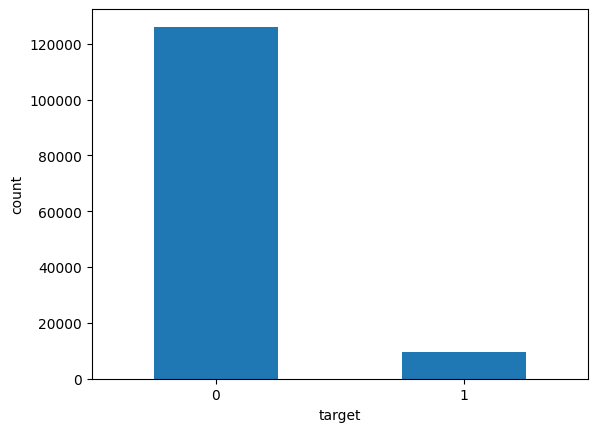

Fold 0:
--> fold train size: (75077, 185)
--> fold valid size: (8640, 185)
--> fold test size: (8640, 185)
  dataset  K  f1_score  precision  recall    TP   FP     TN    FN  \
0   train  0      0.86       0.97    0.78  4722  163  68835  1357   
1   valid  0      0.00       0.01    0.00     1  196   8087   356   
2    test  0      0.14       0.24    0.10    47  150   8020   423   

             Min_date            Max_date train_duration  profit_percent  \
0 2023-01-10 03:55:00 2024-01-09 20:15:00            5.2             NaN   
1 2024-02-20 20:20:00 2024-04-02 20:15:00            5.2         -113.26   
2 2024-04-02 20:20:00 2024-05-14 20:15:00            5.2          162.87   

   max_dd n_unique_days n_max_daily_sig  
0     NaN          None            None  
1 -113.56            14              65  
2  -29.39            15              51  
Fold 1:
--> fold train size: (92357, 185)
--> fold valid size: (8640, 185)
--> fold test size: (8640, 185)
  dataset  K  f1_score  precision  r

In [46]:
if MANUAL_EXP:
    exp_obj, exp_metadata, artifact_name = main(
        manual = True,
        man_params = man_params[model_type],
    )

In [47]:
imp_fe = list(exp_obj.feature_importance[exp_obj.feature_importance.cv<.5].feature_name)
exp_obj.feature_importance[exp_obj.feature_importance.cv<.5].feature_name

175             fe_market_close_EURUSD_Sydney_time
177             fe_market_close_EURUSD_London_time
7                              fe_time_month_start
72                fe_ATR_EURUSD_M240_W30_cndl_M240
166    fe_cndl_shift_EURUSD_M1440_HIGH_to_CLOSE_-1
                          ...                     
81                  fe_cndl_EURUSD_M5_HIGH_to_OPEN
137        fe_cndl_shift_EURUSD_M5_HIGH_to_OPEN_-1
136       fe_cndl_shift_EURUSD_M5_HIGH_to_CLOSE_-1
78                 fe_cndl_EURUSD_M5_CLOSE_to_OPEN
80                 fe_cndl_EURUSD_M5_HIGH_to_CLOSE
Name: feature_name, Length: 144, dtype: object

In [48]:
def plot_feature_importances_scatter(importance_df, top_n=10, figsize=(8, 6)):
    # Calculate mean importance and sort features
    mean_importance = importance_df['mean_importance']
    sorted_idx = mean_importance.argsort()[::-1]
    top_features = importance_df.iloc[sorted_idx[:top_n]]
    imp_cols = [f for f in importance_df if 'importance_fold' in f]
    # Prepare data for scatter plot
    feature_names = top_features['feature_name']
    importance_values = top_features[imp_cols].values.T  # Transpose for plotting

    # Calculate median importance
    median_importance = top_features['median_importance']

    # Create scatter plot
    fig, ax = plt.subplots(figsize=figsize)
    
    for i, feature in enumerate(feature_names):
        ax.scatter([i] * importance_values.shape[0], importance_values[:, i], 
                   alpha=0.6, label=feature)

    # Plot median line
    ax.plot(range(top_n), median_importance, color='red', linestyle='--', 
            linewidth=2, label='Median')
    
    # Add value labels on the median line
    for i, v in enumerate(median_importance):
        ax.text(i, v, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Feature Importance', fontsize=12)
    ax.set_title(f'Top {top_n} Feature Importances Across Folds with Median', fontsize=14)
    ax.set_xticks(range(top_n))
    ax.set_xticklabels(feature_names, rotation=45, ha='right')
#     ax.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

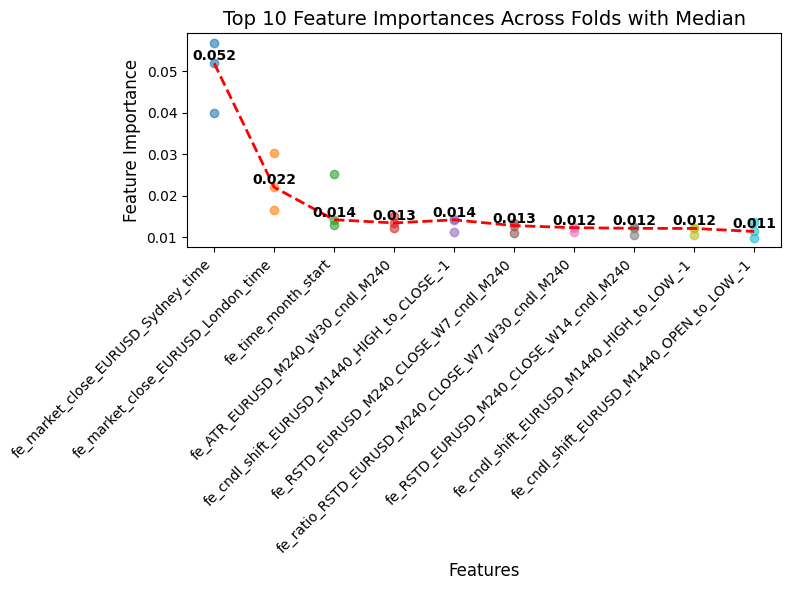

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_feature_importances_scatter(exp_obj.feature_importance)

### Save manual object on W&B as Artifact

In [50]:
if MANUAL_EXP:
    wandb.init(entity = 'alpha-hunters', project = 'algotrading-project')
    obj_artifact = wandb.Artifact(artifact_name, 'manual_experiment', metadata = exp_metadata)
    obj_artifact.add_file(local_path=exp_obj.store_name+'.zip', name=exp_obj.store_name+'.zip')
    wandb.log_artifact(obj_artifact)

In [51]:
if MANUAL_EXP:
    wandb.finish()

## Save imp_features (when we have RANDOM features)

In [53]:
if MANUAL_EXP:
    upload_imp_features = True
    symbol = man_params[model_type]['target_symbol']
    trade_mode = man_params[model_type]['trade_mode']
    look_ahead = man_params[model_type]['trg_look_ahead']
    take_profit = man_params[model_type]['trg_take_profit']
    stop_loss = man_params[model_type]['trg_stop_loss']

In [54]:
if MANUAL_EXP and upload_imp_features :
    print('save_imp_features ')
    import pickle as pkl
    the_name = f"df_feature_imp_{trade_mode}_{symbol}_M{look_ahead}_TP{take_profit}_SL{stop_loss}.pkl"
    file = open(the_name, 'wb')
    pkl.dump(exp_obj.feature_importance,file)
    file.close()
    
    imp_artifact_name = artifact_name + '_imp_features'
    wandb.init(entity = 'alpha-hunters', project = 'algotrading-project', job_type="feature_selection")
    imp_artifact = wandb.Artifact(imp_artifact_name, 'feature_selection', metadata = exp_metadata)
    imp_artifact.add_file(local_path = the_name,name = the_name)
    print(f"--> dataset size MB: {imp_artifact.size / 1000000}")
    wandb.log_artifact(imp_artifact)
    wandb.finish()

save_imp_features 


--> dataset size MB: 0.014092


# 2. Sweep Experiment using W&B

In [55]:
#? https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook
sweep_configs = {}
sweep_configs['RF'] = {
    "method": "grid",
#     "metric": {"name": "class 1 f0.03_score_train", "goal": "maximize"},
#     'description':description,
    "parameters": {
        'model_name' : {"values": ['RF']},
        
        'target_symbol' : {"values": ['EURUSD']},
        'trade_mode' : {"values": ['long']},
        "trg_look_ahead": {"values": [120]},
        "trg_take_profit": {"values": [12]},
        "trg_stop_loss": {"values": [5]},
        
        "strg_look_ahead": {"values": [120]},
        "strg_take_profit": {"values": [12]},
        "strg_stop_loss": {"values": [5]},
        
        'save_model_mode' : {"values": ['last_train_size']}, # None, 'sample_train_size', 'last_train_size', 'all_data',
        'imp_features' : {"values": [None]},  #  can be set to imp_features or None
        'n_rand_features': {"values": [None]},
        "early_stopping_rounds" :{"values": [None]},
        "n_splits" : {"values": [17]},
        "max_train_size": {"values": [500*288]},
        'test_size' : {"values": [30*288]},
        'train_test_gap' : {"values": [0]},

        
        'n_estimators' : {"values": [200]},
        'max_depth': {"values": [5,12]},
        'max_features' : {"values": [30, 50,80]},
        'max_samples' : {"values": [0.2,0.3,0.4]},
        'class_weight':{'values':[0.13,0.15, 0.18, 0.23]},
        'n_jobs': {"values": [-1]},
        'random_state' : {"values": [42]},
                       
#         "objective": {"values": ["binary:logistic"]},
        
#         "max_depth": {"values": [2, 5, 8, 15, 20, 30]},
#         "learning_rate": {"distribution": "uniform", "min": 0.005, "max": 0.01},
#         "n_estimators": {"distribution": "int_uniform", "min": 50, "max": 300},
#         "min_child_weight": {"distribution": "uniform", "min": 0, "max": 1}, # Used to control over-fitting.
#         "subsample": {"distribution": "uniform", "min": 0.3, "max": 0.5 } ,#Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.

        
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
#         "early_stopping_rounds" :{"values": [40,200]},
#         "gamma": {"distribution": "uniform", "min": 0, "max": 15}, #? float
#         "max_delta_step": {"distribution": "uniform", "min": 0, "max": 15}, #?float
#         "colsample_bytree": {"distribution": "uniform", "min": 0.5, "max": 0.75}, 
#         "reg_lambda": {"distribution": "uniform", "min": 0, "max": 10},
#         "reg_alpha": {"distribution": "uniform", "min": 0, "max": 10},   
#         "train_data_precent": {"distribution": "uniform", "min": 0, "max": 0.98},
#         "train_data_precent": {"distribution": "uniform", "min": 0.5, "max": 0.95},
    },
}

In [56]:
sweep_configs['XGB'] = {
    "method": "grid",
    
    "parameters": {
        'model_name' : {"values": ['XGB']},
        
        'target_symbol' : {"values": ['EURUSD']}, # ["EURUSD","USDCAD","USDJPY","EURJPY","GBPUSD","XAUUSD"]
        'trade_mode' : {"values": ['long']}, # "long", "short"
        "trg_look_ahead": {"values": [300]},
        "trg_take_profit": {"values": [35]},
        "trg_stop_loss": {"values": [5]},
        
        "strg_look_ahead": {"values": [480]},
        "strg_take_profit": {"values": [40]},
        "strg_stop_loss": {"values": [15]},
                
        'n_rand_features': {"values": [None]}, # None or Number
        'save_model_mode' : {"values": [None]}, # None, 'sample_train_size', 'last_train_size', 'all_data',

        "early_stopping_rounds" :{"values": [None]}, #None or Number
        'n_splits' : {"values":[3]},
        'max_train_size' : {"values":[400*288,300*288]},
        'test_size' : {"values":[30*288]},
        'train_test_gap' : {"values": [0]},
        
        "objective": {"values": ["binary:logistic"]},
        "max_depth": {"values": [4,5]},
        "learning_rate": {"values": [0.1,0.01,0.05]},
        'tree_method': {"values": [None]}, #'hist', None
        'device' : {"values": ["cpu"]}, # 'cuda', None
#         "learning_rate": {"distribution": "log_uniform", "min": 1e-5, "max": 5e-1},
        "n_estimators": {"values": [100]},
#         "early_stopping_rounds" :{"distribution": "int_uniform", "min": 5, "max": 150},
#         "early_stopping_rounds" :{"values": [40,200]},
#         "gamma": {"distribution": "uniform", "min": 0, "max": 15}, #? float
        "min_child_weight": {"values": [1]}, # Used to control over-fitting.
#         "max_delta_step": {"distribution": "uniform", "min": 0, "max": 15}, #?float
        "subsample": {"values": [0.3,0.5,0.8]},#Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
        "colsample_bytree": {"values": [0.5,0.8]},
        "reg_lambda": {"values": [0,0.02,0.1]},
#         "reg_alpha": {"distribution": "uniform", "min": 0, "max": 10},
        "scale_pos_weight" : {"values": [1]},#[1,0.95,1.1]
        'random_state': {"values":[42]},
        },
}

In [57]:
%%time

sweep_id = wandb.sweep(
    sweep_configs[model_type],
    entity = 'alpha-hunters',
    project = 'algotrading-project'
)

#!!!!!!!!!!!! SWEEP ID !!!!!!!!!!!!!!!!!
wandb.agent(sweep_id = sweep_id, function = main, entity = 'alpha-hunters',project = 'algotrading-project')
wandb.finish()

Create sweep with ID: ti7uvmrq
Sweep URL: https://wandb.ai/alpha-hunters/algotrading-project/sweeps/ti7uvmrq


wandb: Agent Starting Run: jd05j808 with config:
wandb: 	colsample_bytree: 0.5
wandb: 	device: cpu
wandb: 	early_stopping_rounds: None
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	max_train_size: 115200
wandb: 	min_child_weight: 1
wandb: 	model_name: XGB
wandb: 	n_estimators: 100
wandb: 	n_rand_features: None
wandb: 	n_splits: 3
wandb: 	objective: binary:logistic
wandb: 	random_state: 42
wandb: 	reg_lambda: 0
wandb: 	save_model_mode: None
wandb: 	scale_pos_weight: 1
wandb: 	strg_look_ahead: 480
wandb: 	strg_stop_loss: 15
wandb: 	strg_take_profit: 40
wandb: 	subsample: 0.3
wandb: 	target_symbol: EURUSD
wandb: 	test_size: 8640
wandb: 	trade_mode: long
wandb: 	train_test_gap: 0
wandb: 	tree_method: None
wandb: 	trg_look_ahead: 300
wandb: 	trg_stop_loss: 5
wandb: 	trg_take_profit: 35


Final Parameters of the Model: {'colsample_bytree': 0.5, 'device': 'cpu', 'early_stopping_rounds': None, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.3, 'tree_method': None}
Len all columns in dataframe is 180
Len read columns is 180
Calculating target --->
---> Target trg_clf_long_EURUSD_M300_TP35_SL5 has been generated in 2.84 seconds
df shape:  (135577, 181)
--> df final shape: (135577, 180)
--> df min_time: 2023-01-10 03:55:00 | df max_time: 2024-10-29 21:55:00
--> number of unique days: 135577
Fold 0:
--> fold train size: (83737, 185)
--> fold valid size: (8640, 185)
--> fold test size: (8640, 185)
  dataset  K  f1_score  precision  recall   TP  FP     TN    FN  \
0   train  0      0.31       0.93    0.18  576  46  80542  2573   
1   valid  0      0.00       0.00    0.00    0   7   8470   163   
2    test  0      0.00       0.00    0.00   

f1_score_ex0_test,▁
f1_score_ex0_train,▁
f1_score_ex0_valid,▁
f1_score_ex0_valid&test,▁
max_dd_mean_test,▁
max_dd_mean_valid,▁
max_dd_mean_valid&test,▁
max_dd_median_test,▁
max_dd_median_valid,▁
max_dd_median_valid&test,▁
max_dd_min_test,▁


wandb: Agent Starting Run: ht1twxtr with config:
wandb: 	colsample_bytree: 0.5
wandb: 	device: cpu
wandb: 	early_stopping_rounds: None
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	max_train_size: 115200
wandb: 	min_child_weight: 1
wandb: 	model_name: XGB
wandb: 	n_estimators: 100
wandb: 	n_rand_features: None
wandb: 	n_splits: 3
wandb: 	objective: binary:logistic
wandb: 	random_state: 42
wandb: 	reg_lambda: 0
wandb: 	save_model_mode: None
wandb: 	scale_pos_weight: 1
wandb: 	strg_look_ahead: 480
wandb: 	strg_stop_loss: 15
wandb: 	strg_take_profit: 40
wandb: 	subsample: 0.5
wandb: 	target_symbol: EURUSD
wandb: 	test_size: 8640
wandb: 	trade_mode: long
wandb: 	train_test_gap: 0
wandb: 	tree_method: None
wandb: 	trg_look_ahead: 300
wandb: 	trg_stop_loss: 5
wandb: 	trg_take_profit: 35


Final Parameters of the Model: {'colsample_bytree': 0.5, 'device': 'cpu', 'early_stopping_rounds': None, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.5, 'tree_method': None}
Len all columns in dataframe is 180
Len read columns is 180
Calculating target --->
---> Target trg_clf_long_EURUSD_M300_TP35_SL5 has been generated in 2.89 seconds
df shape:  (135577, 181)
--> df final shape: (135577, 180)
--> df min_time: 2023-01-10 03:55:00 | df max_time: 2024-10-29 21:55:00
--> number of unique days: 135577
Fold 0:
--> fold train size: (83737, 185)
--> fold valid size: (8640, 185)
--> fold test size: (8640, 185)
  dataset  K  f1_score  precision  recall   TP  FP     TN    FN  \
0   train  0      0.32       0.92    0.19  604  49  80539  2545   
1   valid  0      0.00       0.00    0.00    0   0   8477   163   
2    test  0      0.00       0.00    0.00   

/kaggle/working/ML-Algotrading-Project/utils/evaluation_utils.py:40: RuntimeWarning: invalid value encountered in scalar divide
  f"precision_total_{set_name}": evals_df.TP.sum() / (evals_df.TP.sum() + evals_df.FP.sum()),
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


object stored as pickle: XGB_long_EURUSD_M300_TP35_SL5_prof-3.01_max_dd-2.26_median_sig0.00_date2024-10-30_17:48.pkl
object pickle stored zipped: XGB_long_EURUSD_M300_TP35_SL5_prof-3.01_max_dd-2.26_median_sig0.00_date2024-10-30_17:48.pkl


f1_score_ex0_test,▁
f1_score_ex0_train,▁
f1_score_ex0_valid&test,▁
max_dd_mean_test,▁
max_dd_mean_valid,▁
max_dd_mean_valid&test,▁
max_dd_median_test,▁
max_dd_median_valid,▁
max_dd_median_valid&test,▁
max_dd_min_test,▁
max_dd_min_valid,▁


wandb: Agent Starting Run: 583iddg2 with config:
wandb: 	colsample_bytree: 0.5
wandb: 	device: cpu
wandb: 	early_stopping_rounds: None
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	max_train_size: 115200
wandb: 	min_child_weight: 1
wandb: 	model_name: XGB
wandb: 	n_estimators: 100
wandb: 	n_rand_features: None
wandb: 	n_splits: 3
wandb: 	objective: binary:logistic
wandb: 	random_state: 42
wandb: 	reg_lambda: 0
wandb: 	save_model_mode: None
wandb: 	scale_pos_weight: 1
wandb: 	strg_look_ahead: 480
wandb: 	strg_stop_loss: 15
wandb: 	strg_take_profit: 40
wandb: 	subsample: 0.8
wandb: 	target_symbol: EURUSD
wandb: 	test_size: 8640
wandb: 	trade_mode: long
wandb: 	train_test_gap: 0
wandb: 	tree_method: None
wandb: 	trg_look_ahead: 300
wandb: 	trg_stop_loss: 5
wandb: 	trg_take_profit: 35


Final Parameters of the Model: {'colsample_bytree': 0.5, 'device': 'cpu', 'early_stopping_rounds': None, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'reg_lambda': 0, 'scale_pos_weight': 1, 'subsample': 0.8, 'tree_method': None}
Len all columns in dataframe is 180
Len read columns is 180
Calculating target --->
---> Target trg_clf_long_EURUSD_M300_TP35_SL5 has been generated in 2.94 seconds
df shape:  (135577, 181)
--> df final shape: (135577, 180)
--> df min_time: 2023-01-10 03:55:00 | df max_time: 2024-10-29 21:55:00
--> number of unique days: 135577
Fold 0:
--> fold train size: (83737, 185)
--> fold valid size: (8640, 185)
--> fold test size: (8640, 185)


wandb: Ctrl + C detected. Stopping sweep.


CPU times: user 2min 47s, sys: 6.38 s, total: 2min 53s
Wall time: 2min 7s
  dataset  K  f1_score  precision  recall   TP  FP     TN    FN  \
0   train  0      0.31       0.93    0.18  577  46  80542  2572   
1   valid  0      0.00       0.00    0.00    0   2   8475   163   
2    test  0      0.00       0.00    0.00    0   0   8415   225   

             Min_date            Max_date train_duration  profit_percent  \
0 2023-01-10 03:55:00 2024-02-20 21:55:00            6.4             NaN   
1 2024-02-20 22:00:00 2024-04-02 21:55:00            6.4            -3.4   
2 2024-04-02 22:00:00 2024-05-14 21:55:00            6.4             0.0   

   max_dd n_unique_days n_max_daily_sig  
0     NaN          None            None  
1   -1.73             1               2  
2    0.00             0             NaN  Socket operation on non-socket


Traceback (most recent call last):


In [58]:
# Import necessary libraries
import wandb

# The sweep ID should be the same as the one you started with
# Resume the sweep
wandb.agent(sweep_id=sweep_id, function=main, entity='alpha-hunters', project='algotrading-project')

# Finish the sweep
wandb.finish()

wandb: Agent Starting Run: 4nbufjaf with config:
wandb: 	colsample_bytree: 0.5
wandb: 	device: cpu
wandb: 	early_stopping_rounds: None
wandb: 	learning_rate: 0.1
wandb: 	max_depth: 4
wandb: 	max_train_size: 115200
wandb: 	min_child_weight: 1
wandb: 	model_name: XGB
wandb: 	n_estimators: 100
wandb: 	n_rand_features: None
wandb: 	n_splits: 3
wandb: 	objective: binary:logistic
wandb: 	random_state: 42
wandb: 	reg_lambda: 0.02
wandb: 	save_model_mode: None
wandb: 	scale_pos_weight: 1
wandb: 	strg_look_ahead: 480
wandb: 	strg_stop_loss: 15
wandb: 	strg_take_profit: 40
wandb: 	subsample: 0.3
wandb: 	target_symbol: EURUSD
wandb: 	test_size: 8640
wandb: 	trade_mode: long
wandb: 	train_test_gap: 0
wandb: 	tree_method: None
wandb: 	trg_look_ahead: 300
wandb: 	trg_stop_loss: 5
wandb: 	trg_take_profit: 35


Final Parameters of the Model: {'colsample_bytree': 0.5, 'device': 'cpu', 'early_stopping_rounds': None, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic', 'random_state': 42, 'reg_lambda': 0.02, 'scale_pos_weight': 1, 'subsample': 0.3, 'tree_method': None}
Len all columns in dataframe is 180
Len read columns is 180
Calculating target --->
---> Target trg_clf_long_EURUSD_M300_TP35_SL5 has been generated in 2.97 seconds
df shape:  (135577, 181)
--> df final shape: (135577, 180)
--> df min_time: 2023-01-10 03:55:00 | df max_time: 2024-10-29 21:55:00
--> number of unique days: 135577
Fold 0:
--> fold train size: (83737, 185)
--> fold valid size: (8640, 185)
--> fold test size: (8640, 185)
  dataset  K  f1_score  precision  recall   TP  FP     TN    FN  \
0   train  0       0.3       0.92    0.18  555  49  80539  2594   
1   valid  0       0.0       0.00    0.00    0   2   8475   163   
2    test  0       0.0       0.00    0.00

wandb: Ctrl + C detected. Stopping sweep.


  dataset  K  f1_score  precision  recall   TP  FP      TN    FN  \
6   train  2      0.28       0.94    0.16  615  39  111410  3136   
7   valid  2      0.00       0.00    0.00    0   0    8474   166   
8    test  2      0.00       0.00    0.00    0   0    8443   197   

             Min_date            Max_date train_duration  profit_percent  \
6 2023-01-24 22:00:00 2024-08-06 21:55:00            7.4             NaN   
7 2024-08-06 22:00:00 2024-09-17 21:55:00            7.4             0.0   
8 2024-09-17 22:00:00 2024-10-29 21:55:00            7.4             0.0   

   max_dd n_unique_days n_max_daily_sig  
6     NaN          None            None  
7     0.0             0             NaN  
8     0.0             0             NaN  
CV loop ends
{'profit_percent_val': 2.25, 'max_dd_val': 0.0, 'profit_percent_test': -1.7, 'max_dd_test': 0.0}


Traceback (most recent call last):
Exception in thread Thread-22 (_run_job):
Traceback (most recent call last):
  File "/kaggle/working/ML-Algotrading-Project/main_func.py", line 237, in main
    exp_obj.store_obj()
  File "/kaggle/working/ML-Algotrading-Project/experiment_tracker.py", line 59, in store_obj
    print(f"object stored as pickle: {self.store_name}")
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/iostream.py", line 694, in write
    self._schedule_flush()
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/iostream.py", line 590, in _schedule_flush
    self.pub_thread.schedule(_schedule_in_thread)
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/iostream.py", line 267, in schedule
    self._event_pipe.send(b"")
  File "/opt/conda/lib/python3.10/site-packages/zmq/sugar/socket.py", line 701, in send
    return super().send(data, flags=flags, copy=copy, track=track)
  File "_zmq.py", line 1073, in zmq.backend.cython._zmq.Socket.send
  File "_zmq.py",

object stored as pickle: XGB_long_EURUSD_M300_TP35_SL5_prof-1.70_max_dd0.00_median_sig0.00_date2024-10-30_17:49.pklSocket operation on non-socket


In [ ]:
#STOP SWEEP
if not MANUAL_EXP:
    print('Finishing The SWEEP ...')
    print(f'{1/0}')

# Filter models from W&B

In [ ]:
runs_filter = {'path' : "alpha-hunters/algotrading-project",# /artifacts/experiment/trg_clf_long_EURUSD_M240_TP25_SL10
               "order": "+summary_metrics.profit_percent_test",
    'filters': {"$and": [  
#                         {"state":'finished'},
                        {"createdAt":{ '$gte': '2024-06-01' }},
                        {"sweep":'jmw8zpy9'},
        
                        ########### GENERAL CONFIG #############
                        {"config.target_symbol":'EURUSD'}, 
                        {"config.trade_mode": 'long'},
#                         {"config.look_ahead": 480},
#                         {"config.strg_take_profit": 40},
#                         {"config.strg_stop_loss": 15},
                        {"config.model_name":'XGB'},
#                         ########### MODEL CONFIG #############
#                         {"config.max_depth": 3 },
#                         {"config.n_estimators": { "$gte": 100 } },
#                         {"config.learning_rate": { "$lt": 1 }},
#                         {"config.random_state": 42 },
                        
                        ########### MODEL METRICS #############
                        {"summary_metrics.profit_percent_test" : { "$gte": 10}},
                        {"summary_metrics.profit_percent_val" : { "$gte": 10}},
                        
                        {"summary_metrics.profit_percent_median_test" : { "$gte": 5}},
                        {"summary_metrics.profit_percent_median_valid" : { "$gte": 5}},
        
                        {"summary_metrics.max_dd_min_test" : { "$gte":-40}},
                        {"summary_metrics.max_dd_min_valid" : { "$gte":-40}},

                        {"summary_metrics.max_dd_test" : { "$gte":-40}},
                        {"summary_metrics.max_dd_val" : { "$gte":-40}},

        

                                ]
            }
}
runs=api.runs(**runs_filter)
print(len(runs))

In [ ]:
# wandb.finish()

In [ ]:
import shutil
import os
if os.path.isdir("/kaggle/working/artifacts"):
    shutil.rmtree("/kaggle/working/artifacts")
meta_datas=fetch_artifacts(runs_filter)

In [ ]:
objects = read_tracker_objects("/kaggle/working/artifacts")

In [ ]:
# objects['XGB_long_USDJPY_M300_TP35_SL5_prof531.41_max_dd-56.54_median_sig9.00_date2024-07-08_21:24']['obj'].evals

## Selected Models' Config

In [ ]:
import pandas as pd
for i,k in enumerate(objects):
    if i == 0:
        df_config = pd.DataFrame(objects[k]['obj'].config, index = [0])
#         display(df_config)
    else:
        df_config = pd.concat([df_config,pd.DataFrame(objects[k]['obj'].config, index = [0])])
# df_config[['colsample_bytree',
#        'learning_rate', 'trg_look_ahead', 'max_depth', 'max_train_size',
#        'min_child_weight', 'model_name', 'n_estimators', 'save_model_mode', 'scale_pos_weight',
#        'subsample', 'trg_take_profit', 'target_symbol', 'tree_method']]
df_config

## Feature Importance

In [ ]:
for i,k in enumerate(objects):
    if i == 0:
        df_imp = objects[k]['obj'].feature_importance
        df_imp.rename(columns = {'importances': f'importances_{i}'}, inplace =True)
    else:
        
        df_imp = df_imp.merge(objects[k]['obj'].feature_importance.rename(columns = {'importances': f'importances_{i}'}),
                             on = 'feature_name')
imp_cols = [f for f in df_imp.columns if 'importances_' in f]
df_imp['imp_mean'] =df_imp[imp_cols].mean(axis = 1)
df_imp.sort_values('imp_mean', ascending = False)[:30]

## Models' Correlation

In [ ]:
import pandas as pd
def cal_corr_tar1_predictions(objects):
    '''Calculate corrilation between models Just for target==1'''
    corr_ls=[]
    for i,n in enumerate(objects):

        val_predictions = objects[n]['obj'].val_predictions
        val_predictions=val_predictions[val_predictions.target==1][['pred_as_val','target']].replace(0, -1)
        corr_ls.append((n,val_predictions))
    print("Total_model_count:", len(corr_ls))
        
    from sklearn.metrics import matthews_corrcoef
    corr_dict={}
    for i in range(0,len(corr_ls)):
        for j in range(i+1,len(corr_ls)):
            corr_dict[(corr_ls[i][0],corr_ls[j][0])]=matthews_corrcoef(corr_ls[i][1]['pred_as_val'], corr_ls[j][1]['pred_as_val'])
        
        
    corr_df=pd.DataFrame([k + (v,) for k, v in corr_dict.items()], columns=['model1', 'model2', 'M_corr'])
    print('combination checked:', corr_df.shape[0])
    corr_df.hist('M_corr')
    return corr_df

corr_df=cal_corr_tar1_predictions(objects)

In [ ]:
# corr_df[corr_df.M_corr<0.7]
corr_df